In [2]:
# IMPORT REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# DEFINE TARGET NEIGHBORHOODS AND THEIR RELEVANT STATIONS/ROUTES
target_neighborhoods = {
    'Elmhurst/Jackson Heights': {
        'subway_stations': [
            '74-Broadway (7)',
            'Jackson Hts-Roosevelt Av',
            'Elmhurst Av'
        ],
        'bus_routes': ['Q32', 'Q33', 'Q47', 'Q49', 'Q53+', 'Q70+']
    },
    'Flushing': {
        'subway_stations': [
            'Flushing-Main St',
            'Mets-Willets Point'
        ],
        'bus_routes': ['Q12', 'Q13', 'Q15', 'Q16', 'Q17', 'Q19', 'Q20A', 'Q20B', 'Q44+', 'Q48']
    },
    'Sunset Park': {
        'subway_stations': [
            '36 St',
            '45 St',
            '53 St',
            '59 St',
            '8 Av'
        ],
        'bus_routes': ['B11', 'B35', 'B37', 'B63', 'B70']
    },
    'Brownsville': {
        'subway_stations': [
            'Sutter Av-Rutland Rd',
            'Saratoga Av',
            'Rockaway Av'
        ],
        'bus_routes': ['B14', 'B15', 'B20', 'B60', 'B82+']
    },
    'Morrisania': {
        'subway_stations': [
            '167 St',
            '170 St',
            'Freeman St'
        ],
        'bus_routes': ['BX11', 'BX15', 'BX21', 'BX35', 'BX41']
    },
    'Highbridge': {
        'subway_stations': [
            '170 St',
            '167 St',
            '161 St-Yankee Stadium'
        ],
        'bus_routes': ['BX13', 'BX35', 'BX1', 'BX2']
    }
}

# FUNCTION TO ANALYZE FAIR FARES USAGE IN A NEIGHBORHOOD
def analyze_neighborhood_fair_fares(subway_df, bus_df, neighborhood_name, neighborhood_info):
    """
    Analyzes Fair Fares usage patterns in a specific neighborhood.
    
    Parameters:
    subway_df (DataFrame): Subway ridership data
    bus_df (DataFrame): Bus ridership data
    neighborhood_name (str): Name of the neighborhood
    neighborhood_info (dict): Dictionary containing subway stations and bus routes
    
    Returns:
    dict: Analysis results for the neighborhood
    """
    # FILTER DATA FOR THE NEIGHBORHOOD
    neighborhood_subway = subway_df[
        subway_df['station_complex'].str.contains('|'.join(neighborhood_info['subway_stations']), 
                                                na=False)
    ]
    
    neighborhood_bus = bus_df[
        bus_df['bus_route'].isin(neighborhood_info['bus_routes'])
    ]
    
    # CALCULATE FAIR FARES METRICS
    analysis = {
        'neighborhood': neighborhood_name,
        'subway_metrics': {
            'total_rides': neighborhood_subway['ridership'].sum(),
            'fair_fares_rides': neighborhood_subway[
                neighborhood_subway['fare_class_category'].str.contains('Fair Fare')
            ]['ridership'].sum(),
            'peak_hours': neighborhood_subway.groupby('hour')['ridership'].sum().idxmax(),
            'most_used_stations': neighborhood_subway.groupby('station_complex')['ridership'].sum().nlargest(3)
        },
        'bus_metrics': {
            'total_rides': neighborhood_bus['ridership'].sum(),
            'fair_fares_rides': neighborhood_bus[
                neighborhood_bus['fare_class_category'].str.contains('Fair Fare')
            ]['ridership'].sum(),
            'peak_hours': neighborhood_bus.groupby('hour')['ridership'].sum().idxmax(),
            'most_used_routes': neighborhood_bus.groupby('bus_route')['ridership'].sum().nlargest(3)
        }
    }
    
    # ADD FAIR FARES PERCENTAGE CALCULATIONS
    analysis['fair_fares_percentage'] = {
        'subway': (analysis['subway_metrics']['fair_fares_rides'] / 
                  analysis['subway_metrics']['total_rides'] * 100),
        'bus': (analysis['bus_metrics']['fair_fares_rides'] / 
               analysis['bus_metrics']['total_rides'] * 100),
        'overall': ((analysis['subway_metrics']['fair_fares_rides'] + 
                    analysis['bus_metrics']['fair_fares_rides']) /
                   (analysis['subway_metrics']['total_rides'] + 
                    analysis['bus_metrics']['total_rides']) * 100)
    }
    
    return analysis

# LET'S TRY IT WITH ONE NEIGHBORHOOD FIRST
try:
    # LOAD THE DATA
    print("LOADING DATA...")
    subway_df = pd.read_csv('../data/processed/subway_cleaned.csv')
    bus_df = pd.read_csv('../data/processed/bus_cleaned.csv')
    
    # ANALYZE ELMHURST/JACKSON HEIGHTS AS A TEST
    test_neighborhood = 'Elmhurst/Jackson Heights'
    results = analyze_neighborhood_fair_fares(
        subway_df, 
        bus_df, 
        test_neighborhood, 
        target_neighborhoods[test_neighborhood]
    )
    
    # PRINT RESULTS IN A READABLE FORMAT
    print(f"\nANALYSIS FOR {test_neighborhood}")
    print("=" * 50)
    print(f"OVERALL FAIR FARES USAGE: {results['fair_fares_percentage']['overall']:.2f}%")
    print("\nSUBWAY METRICS:")
    print(f"- Total Rides: {results['subway_metrics']['total_rides']:,.0f}")
    print(f"- Fair Fares Usage: {results['fair_fares_percentage']['subway']:.2f}%")
    print(f"- Peak Hour: {results['subway_metrics']['peak_hours']:02d}:00")
    print("\nBUS METRICS:")
    print(f"- Total Rides: {results['bus_metrics']['total_rides']:,.0f}")
    print(f"- Fair Fares Usage: {results['fair_fares_percentage']['bus']:.2f}%")
    print(f"- Peak Hour: {results['bus_metrics']['peak_hours']:02d}:00")
    
except Exception as e:
    print(f"AN ERROR OCCURRED: {str(e)}")

LOADING DATA...


/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/3873618582.py:125: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_df = pd.read_csv('../data/processed/subway_cleaned.csv')
/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/3873618582.py:78: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subway_df['station_complex'].str.contains('|'.join(neighborhood_info['subway_stations']),



ANALYSIS FOR Elmhurst/Jackson Heights
OVERALL FAIR FARES USAGE: 3.61%

SUBWAY METRICS:
- Total Rides: 54,118,622
- Fair Fares Usage: 3.39%
- Peak Hour: 08:00

BUS METRICS:
- Total Rides: 29,461,563
- Fair Fares Usage: 4.01%
- Peak Hour: 07:00


/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/355036115.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subway_df['station_complex'].str.contains('|'.join(neighborhood_info['subway_stations']),


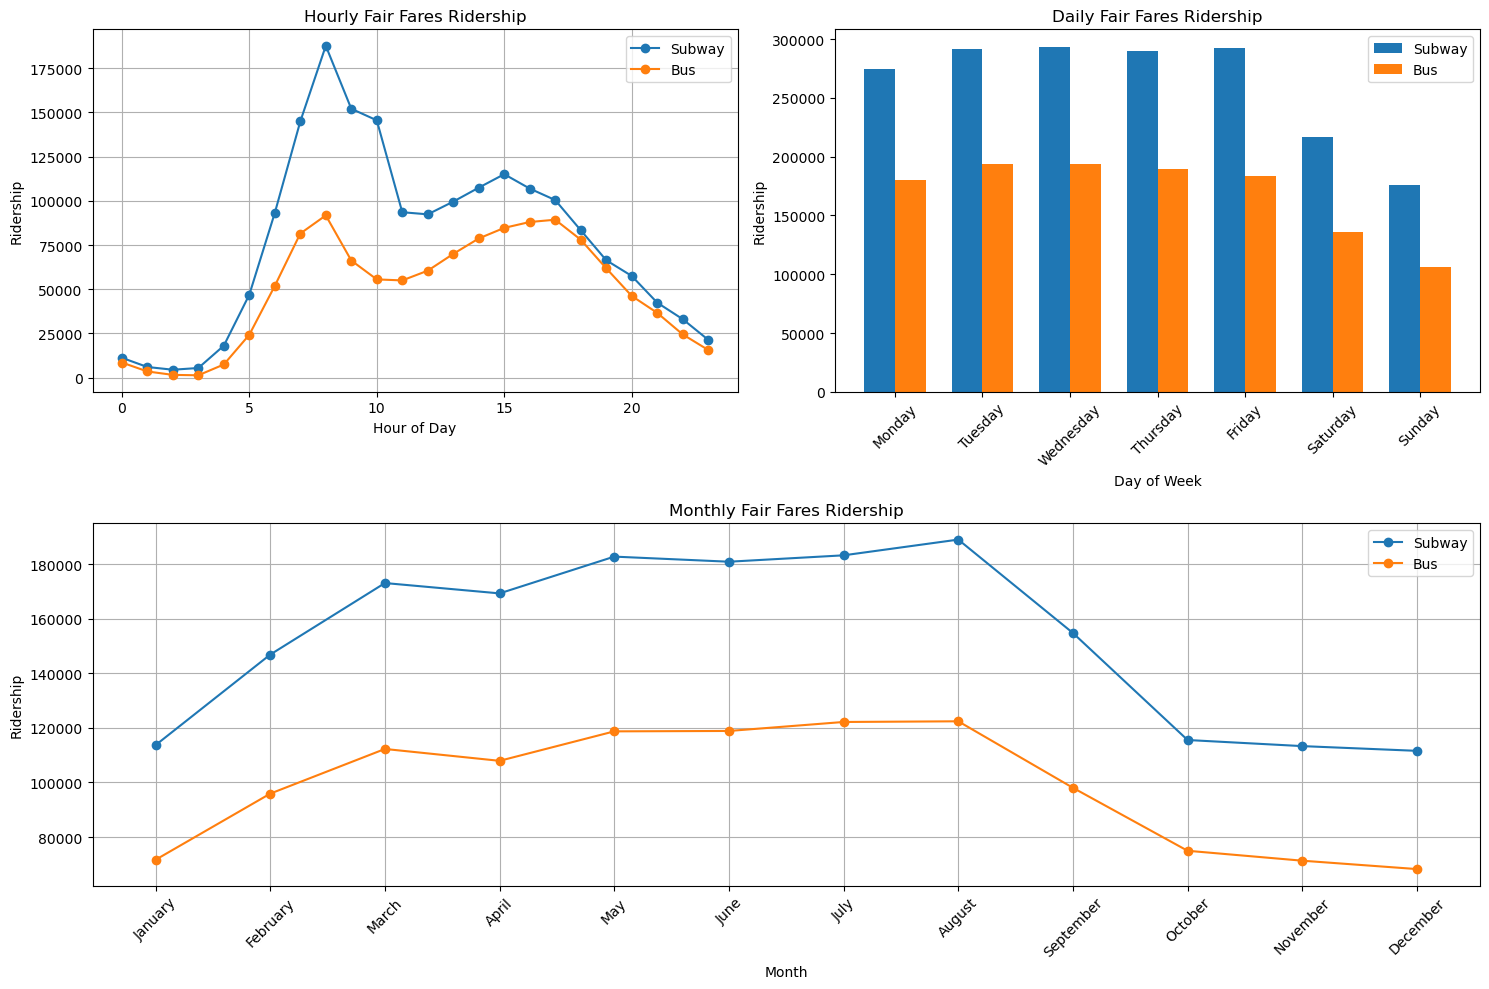


KEY TEMPORAL INSIGHTS FOR ELMHURST/JACKSON HEIGHTS:
PEAK USAGE HOURS:
- Subway: 08:00
- Bus: 08:00

BUSIEST WEEKDAYS:
- Subway: Wednesday
- Bus: Wednesday


In [3]:
# FUNCTION TO ANALYZE TEMPORAL PATTERNS OF FAIR FARES USAGE
def analyze_temporal_patterns(subway_df, bus_df, neighborhood_info):
    """
    Analyzes Fair Fares usage patterns by time of day, day of week, and month
    for a specific neighborhood's transit services.
    """
    # FILTER NEIGHBORHOOD DATA
    neighborhood_subway = subway_df[
        subway_df['station_complex'].str.contains('|'.join(neighborhood_info['subway_stations']), 
                                                na=False)
    ]
    
    neighborhood_bus = bus_df[
        bus_df['bus_route'].isin(neighborhood_info['bus_routes'])
    ]
    
    # FAIR FARES USERS ONLY
    subway_fair_fares = neighborhood_subway[
        neighborhood_subway['fare_class_category'].str.contains('Fair Fare')
    ]
    bus_fair_fares = neighborhood_bus[
        neighborhood_bus['fare_class_category'].str.contains('Fair Fare')
    ]
    
    # CALCULATE HOURLY PATTERNS
    subway_hourly = subway_fair_fares.groupby('hour')['ridership'].sum()
    bus_hourly = bus_fair_fares.groupby('hour')['ridership'].sum()
    
    # CALCULATE DAILY PATTERNS
    subway_daily = subway_fair_fares.groupby('day_of_week')['ridership'].sum()
    bus_daily = bus_fair_fares.groupby('day_of_week')['ridership'].sum()
    
    # CALCULATE MONTHLY PATTERNS
    subway_monthly = subway_fair_fares.groupby('month')['ridership'].sum()
    bus_monthly = bus_fair_fares.groupby('month')['ridership'].sum()
    
    # CREATE VISUALIZATION
    plt.figure(figsize=(15, 10))
    
    # PLOT HOURLY PATTERNS
    plt.subplot(2, 2, 1)
    plt.plot(subway_hourly.index, subway_hourly.values, label='Subway', marker='o')
    plt.plot(bus_hourly.index, bus_hourly.values, label='Bus', marker='o')
    plt.title('Hourly Fair Fares Ridership')
    plt.xlabel('Hour of Day')
    plt.ylabel('Ridership')
    plt.legend()
    plt.grid(True)
    
    # PLOT DAILY PATTERNS
    plt.subplot(2, 2, 2)
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    width = 0.35
    x = np.arange(len(days))
    
    subway_daily = subway_daily.reindex(days)
    bus_daily = bus_daily.reindex(days)
    
    plt.bar(x - width/2, subway_daily.values, width, label='Subway')
    plt.bar(x + width/2, bus_daily.values, width, label='Bus')
    plt.title('Daily Fair Fares Ridership')
    plt.xlabel('Day of Week')
    plt.ylabel('Ridership')
    plt.xticks(x, days, rotation=45)
    plt.legend()
    
    # PLOT MONTHLY PATTERNS
    plt.subplot(2, 2, (3, 4))
    months = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
    
    subway_monthly = subway_monthly.reindex(months)
    bus_monthly = bus_monthly.reindex(months)
    
    plt.plot(months, subway_monthly.values, label='Subway', marker='o')
    plt.plot(months, bus_monthly.values, label='Bus', marker='o')
    plt.title('Monthly Fair Fares Ridership')
    plt.xlabel('Month')
    plt.ylabel('Ridership')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    
    return {
        'hourly': {
            'subway': subway_hourly,
            'bus': bus_hourly
        },
        'daily': {
            'subway': subway_daily,
            'bus': bus_daily
        },
        'monthly': {
            'subway': subway_monthly,
            'bus': bus_monthly
        }
    }

# ANALYZE TEMPORAL PATTERNS FOR ELMHURST/JACKSON HEIGHTS
try:
    temporal_results = analyze_temporal_patterns(
        subway_df, 
        bus_df, 
        target_neighborhoods['Elmhurst/Jackson Heights']
    )
    
    # DISPLAY PLOT
    plt.show()
    
    # PRINT KEY INSIGHTS
    print("\nKEY TEMPORAL INSIGHTS FOR ELMHURST/JACKSON HEIGHTS:")
    print("=" * 50)
    
    # PEAK USAGE TIMES
    subway_peak_hour = temporal_results['hourly']['subway'].idxmax()
    bus_peak_hour = temporal_results['hourly']['bus'].idxmax()
    print(f"PEAK USAGE HOURS:")
    print(f"- Subway: {subway_peak_hour:02d}:00")
    print(f"- Bus: {bus_peak_hour:02d}:00")
    
    # BUSIEST WEEKDAY
    subway_peak_day = temporal_results['daily']['subway'].idxmax()
    bus_peak_day = temporal_results['daily']['bus'].idxmax()
    print(f"\nBUSIEST WEEKDAYS:")
    print(f"- Subway: {subway_peak_day}")
    print(f"- Bus: {bus_peak_day}")
    
except Exception as e:
    print(f"AN ERROR OCCURRED: {str(e)}")

/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/1429237334.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']),



NEIGHBORHOOD COMPARISON INSIGHTS:

FAIR FARES USAGE RANKING:

Morrisania:
- Overall Usage: 9.57%
- Subway Usage: 8.08%
- Bus Usage: 10.96%
- Total Rides: 35,597,446

Highbridge:
- Overall Usage: 8.50%
- Subway Usage: 7.00%
- Bus Usage: 10.93%
- Total Rides: 47,587,627

Brownsville:
- Overall Usage: 7.33%
- Subway Usage: 6.32%
- Bus Usage: 7.88%
- Total Rides: 30,861,659

Flushing:
- Overall Usage: 4.01%
- Subway Usage: 3.68%
- Bus Usage: 4.30%
- Total Rides: 87,039,493

Elmhurst/Jackson Heights:
- Overall Usage: 3.61%
- Subway Usage: 3.39%
- Bus Usage: 4.01%
- Total Rides: 83,580,185

Sunset Park:
- Overall Usage: 3.47%
- Subway Usage: 3.15%
- Bus Usage: 5.89%
- Total Rides: 237,302,086


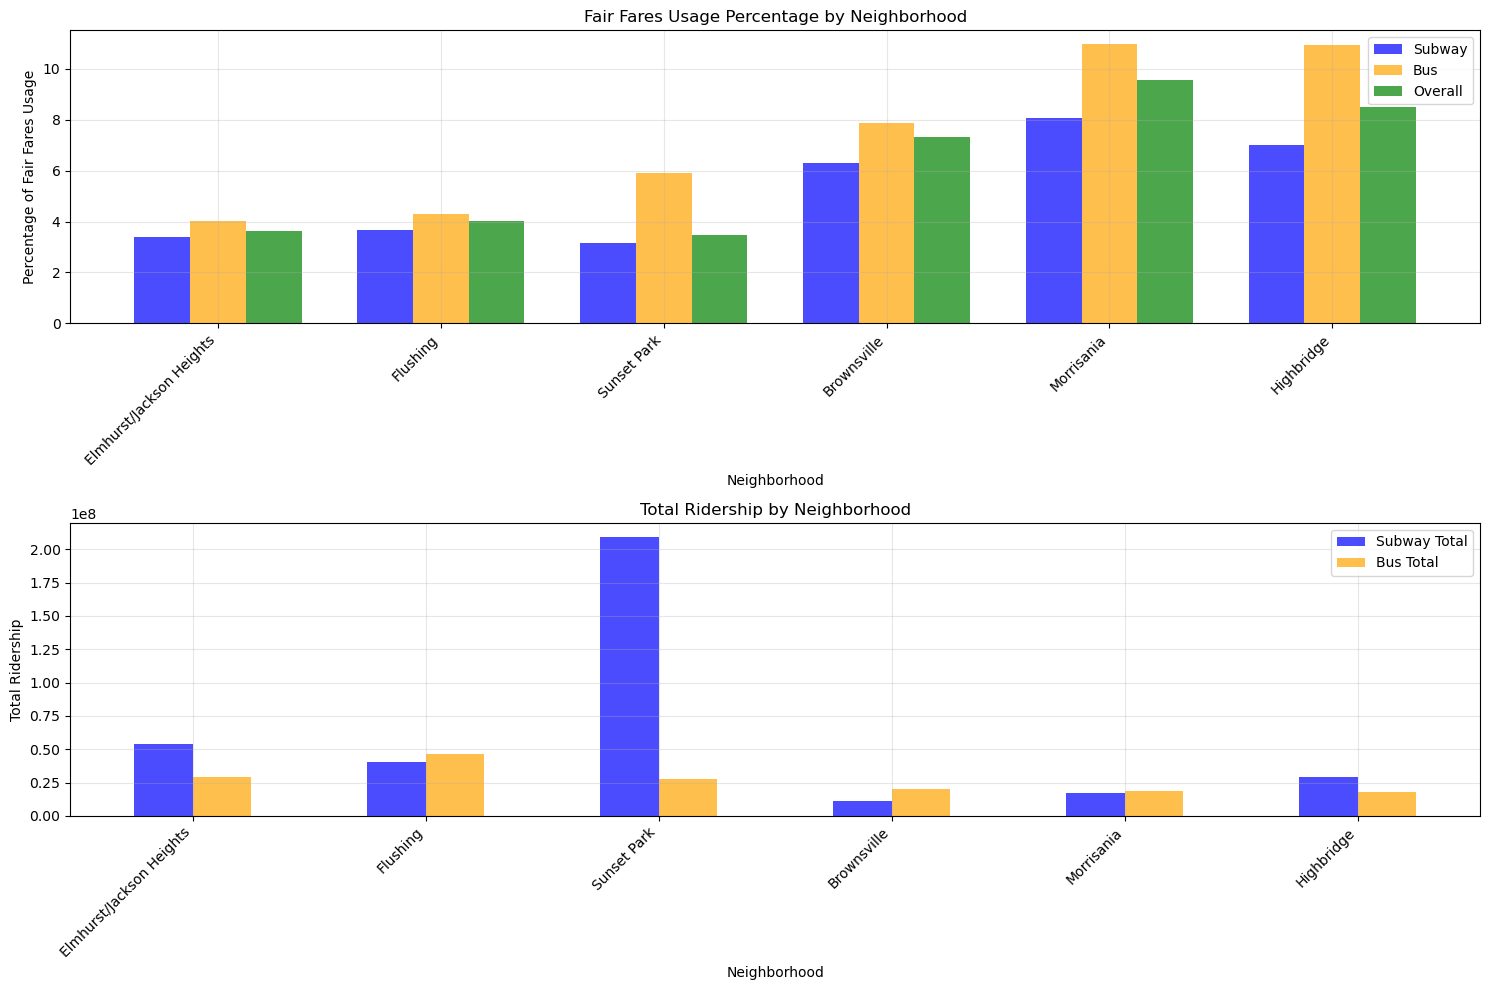

In [4]:
# FUNCTION TO COMPARE FAIR FARES USAGE ACROSS ALL TARGET NEIGHBORHOODS
def compare_neighborhoods(subway_df, bus_df, target_neighborhoods):
    """
    Creates a comprehensive comparison of Fair Fares usage across all target neighborhoods.
    Generates visualizations and statistical comparisons.
    """
    comparison_data = {}
    
    # COLLECT DATA FOR EACH NEIGHBORHOOD
    for hood_name, hood_info in target_neighborhoods.items():
        # FILTER NEIGHBORHOOD DATA
        hood_subway = subway_df[
            subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']), 
                                                    na=False)
        ]
        
        hood_bus = bus_df[
            bus_df['bus_route'].isin(hood_info['bus_routes'])
        ]
        
        # CALCULATE METRICS
        comparison_data[hood_name] = {
            'subway_total': hood_subway['ridership'].sum(),
            'subway_fair_fares': hood_subway[
                hood_subway['fare_class_category'].str.contains('Fair Fare')
            ]['ridership'].sum(),
            'bus_total': hood_bus['ridership'].sum(),
            'bus_fair_fares': hood_bus[
                hood_bus['fare_class_category'].str.contains('Fair Fare')
            ]['ridership'].sum()
        }
        
        # ADD PERCENTAGE CALCULATIONS
        comparison_data[hood_name].update({
            'subway_percentage': (comparison_data[hood_name]['subway_fair_fares'] / 
                                comparison_data[hood_name]['subway_total'] * 100),
            'bus_percentage': (comparison_data[hood_name]['bus_fair_fares'] / 
                             comparison_data[hood_name]['bus_total'] * 100),
            'overall_percentage': ((comparison_data[hood_name]['subway_fair_fares'] + 
                                  comparison_data[hood_name]['bus_fair_fares']) /
                                 (comparison_data[hood_name]['subway_total'] + 
                                  comparison_data[hood_name]['bus_total']) * 100)
        })
    
    # CREATE VISUALIZATIONS
    plt.figure(figsize=(15, 10))
    
    # PLOT FAIR FARES USAGE PERCENTAGES
    plt.subplot(2, 1, 1)
    neighborhoods = list(comparison_data.keys())
    x = np.arange(len(neighborhoods))
    width = 0.25
    
    plt.bar(x - width, [data['subway_percentage'] for data in comparison_data.values()],
           width, label='Subway', color='blue', alpha=0.7)
    plt.bar(x, [data['bus_percentage'] for data in comparison_data.values()],
           width, label='Bus', color='orange', alpha=0.7)
    plt.bar(x + width, [data['overall_percentage'] for data in comparison_data.values()],
           width, label='Overall', color='green', alpha=0.7)
    
    plt.title('Fair Fares Usage Percentage by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Percentage of Fair Fares Usage')
    plt.xticks(x, neighborhoods, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # PLOT TOTAL RIDERSHIP COMPARISON
    plt.subplot(2, 1, 2)
    
    subway_totals = [data['subway_total'] for data in comparison_data.values()]
    bus_totals = [data['bus_total'] for data in comparison_data.values()]
    
    plt.bar(x - width/2, subway_totals, width, label='Subway Total', color='blue', alpha=0.7)
    plt.bar(x + width/2, bus_totals, width, label='Bus Total', color='orange', alpha=0.7)
    
    plt.title('Total Ridership by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Total Ridership')
    plt.xticks(x, neighborhoods, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # CALCULATE AND PRINT STATISTICAL INSIGHTS
    print("\nNEIGHBORHOOD COMPARISON INSIGHTS:")
    print("=" * 50)
    
    # SORT NEIGHBORHOODS BY FAIR FARES USAGE
    sorted_by_usage = sorted(
        comparison_data.items(),
        key=lambda x: x[1]['overall_percentage'],
        reverse=True
    )
    
    print("\nFAIR FARES USAGE RANKING:")
    for hood, data in sorted_by_usage:
        print(f"\n{hood}:")
        print(f"- Overall Usage: {data['overall_percentage']:.2f}%")
        print(f"- Subway Usage: {data['subway_percentage']:.2f}%")
        print(f"- Bus Usage: {data['bus_percentage']:.2f}%")
        print(f"- Total Rides: {data['subway_total'] + data['bus_total']:,.0f}")
    
    return comparison_data

# RUN THE COMPARISON
try:
    neighborhood_comparison = compare_neighborhoods(subway_df, bus_df, target_neighborhoods)
    plt.show()
    
except Exception as e:
    print(f"AN ERROR OCCURRED: {str(e)}")

/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/3985815681.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']),


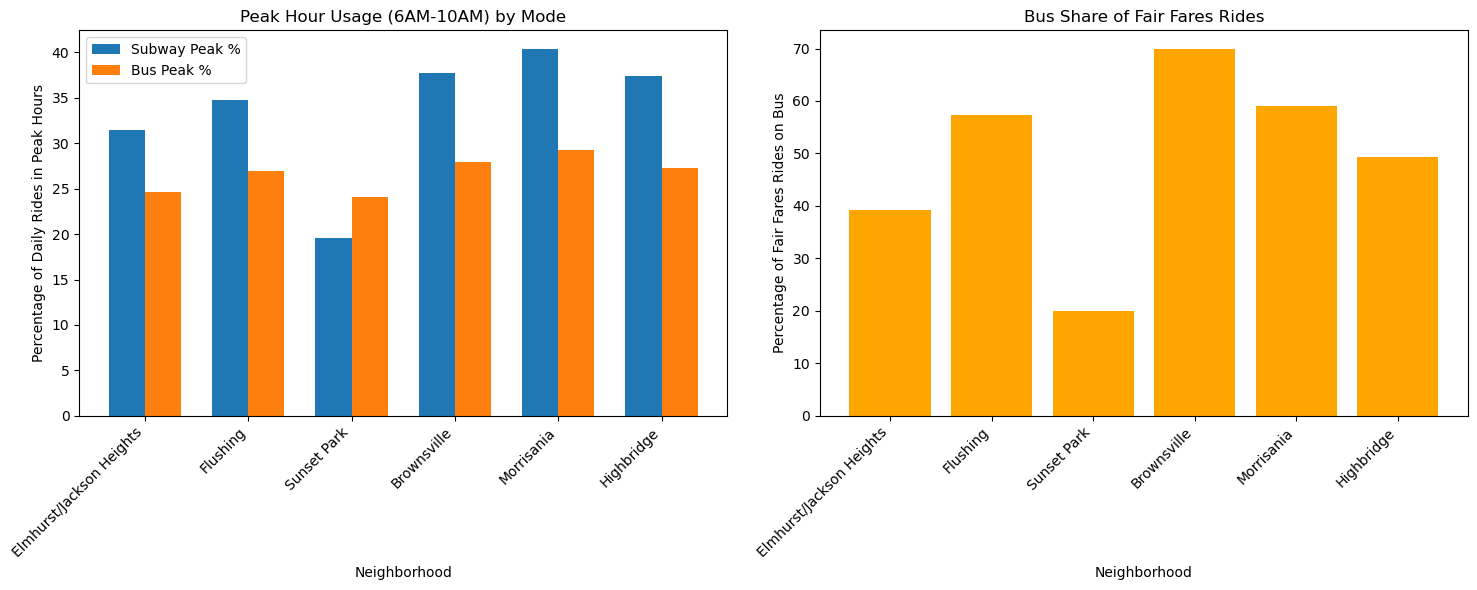

In [5]:
# ANALYZE SPATIAL AND DEMOGRAPHIC PATTERNS IN FAIR FARES USAGE
def analyze_usage_patterns(subway_df, bus_df, target_neighborhoods):
    """
    Analyzes patterns in Fair Fares usage considering time of day and mode split
    """
    pattern_analysis = {}
    
    for hood_name, hood_info in target_neighborhoods.items():
        # FILTER DATA
        hood_subway = subway_df[
            subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']), 
                                                    na=False)
        ]
        hood_bus = bus_df[
            bus_df['bus_route'].isin(hood_info['bus_routes'])
        ]
        
        # ANALYZE PEAK VS OFF-PEAK USAGE
        peak_hours = range(6, 10)  # 6 AM to 10 AM
        
        # SUBWAY ANALYSIS
        subway_fair_fares = hood_subway[
            hood_subway['fare_class_category'].str.contains('Fair Fare')
        ]
        subway_peak = subway_fair_fares[
            subway_fair_fares['hour'].isin(peak_hours)
        ]['ridership'].sum()
        subway_total = subway_fair_fares['ridership'].sum()
        
        # BUS ANALYSIS
        bus_fair_fares = hood_bus[
            hood_bus['fare_class_category'].str.contains('Fair Fare')
        ]
        bus_peak = bus_fair_fares[
            bus_fair_fares['hour'].isin(peak_hours)
        ]['ridership'].sum()
        bus_total = bus_fair_fares['ridership'].sum()
        
        pattern_analysis[hood_name] = {
            'subway_peak_percentage': (subway_peak / subway_total * 100),
            'bus_peak_percentage': (bus_peak / bus_total * 100),
            'mode_split': bus_total / (bus_total + subway_total) * 100
        }
    
    # VISUALIZE THE PATTERNS
    plt.figure(figsize=(15, 6))
    
    # PLOT PEAK USAGE PATTERNS
    plt.subplot(1, 2, 1)
    neighborhoods = list(pattern_analysis.keys())
    x = np.arange(len(neighborhoods))
    width = 0.35
    
    plt.bar(x - width/2, 
           [data['subway_peak_percentage'] for data in pattern_analysis.values()],
           width, label='Subway Peak %')
    plt.bar(x + width/2, 
           [data['bus_peak_percentage'] for data in pattern_analysis.values()],
           width, label='Bus Peak %')
    
    plt.title('Peak Hour Usage (6AM-10AM) by Mode')
    plt.xlabel('Neighborhood')
    plt.ylabel('Percentage of Daily Rides in Peak Hours')
    plt.xticks(x, neighborhoods, rotation=45, ha='right')
    plt.legend()
    
    # PLOT MODE SPLIT
    plt.subplot(1, 2, 2)
    plt.bar(neighborhoods, 
           [data['mode_split'] for data in pattern_analysis.values()],
           color='orange')
    plt.title('Bus Share of Fair Fares Rides')
    plt.xlabel('Neighborhood')
    plt.ylabel('Percentage of Fair Fares Rides on Bus')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    return pattern_analysis

# RUN THE ANALYSIS
pattern_results = analyze_usage_patterns(subway_df, bus_df, target_neighborhoods)
plt.show()

In [10]:
from folium.plugins import HeatMap

# CREATE EFFICIENT NEIGHBORHOOD HEATMAP
def create_neighborhood_heatmap(subway_df, bus_df, target_neighborhoods):
    """
    Creates a memory-efficient interactive heatmap showing Fair Fares usage patterns
    """
    # CREATE BASE MAP CENTERED ON NYC
    nyc_map = folium.Map(
        location=[40.7128, -74.0060],
        zoom_start=11
    )
    
    # CREATE HEATMAP LAYER WITH CLUSTERING
    heatmap_data = []
    
    # PROCESS DATA IN CHUNKS TO MANAGE MEMORY EFFICIENTLY
    for hood_name, hood_info in target_neighborhoods.items():
        # FILTER SUBWAY DATA FOR FAIR FARES USERS IN THIS NEIGHBORHOOD
        hood_subway = subway_df[
            subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']), 
                                                    na=False) &
            subway_df['fare_class_category'].str.contains('Fair Fare')
        ]
        
        # GROUP BY STATION AND CALCULATE TOTAL RIDERSHIP
        station_stats = hood_subway.groupby(['station_complex', 'latitude', 'longitude'])['ridership'].sum().reset_index()
        
        # ADD WEIGHTED POINTS TO HEATMAP DATA
        for _, row in station_stats.iterrows():
            try:
                # CONVERT NUMERIC VALUES TO FLOAT TYPE
                lat = float(row['latitude'])
                lon = float(row['longitude'])
                # NORMALIZE WEIGHT TO PREVENT EXTREME VALUES
                weight = float(min(row['ridership'] / 1000, 1.0))
                
                heatmap_data.append([lat, lon, weight])
            except (ValueError, TypeError) as e:
                print(f"Skipping invalid data point: {e}")
                continue
    
    # ADD HEATMAP LAYER TO MAP
    if heatmap_data:  # Only create heatmap if we have valid data
        HeatMap(
            heatmap_data,
            radius=15,
            blur=10,
            max_zoom=13,
            min_opacity=0.3
        ).add_to(nyc_map)
    
    # ADD NEIGHBORHOOD LABELS FOR CONTEXT
    for hood_name, hood_info in target_neighborhoods.items():
        # Use the first station's coordinates as neighborhood center
        if hood_subway.empty:
            continue
        
        center_point = hood_subway.iloc[0]
        folium.Popup(
            f"{hood_name}<br>Fair Fares Usage: {hood_subway['ridership'].sum():,.0f} rides",
            parse_html=True
        ).add_to(
            folium.CircleMarker(
                location=[float(center_point['latitude']), float(center_point['longitude'])],
                radius=8,
                color='red',
                fill=True,
                popup_anchor=(0, -10)
            ).add_to(nyc_map)
        )
    
    return nyc_map

# EXECUTE THE HEATMAP CREATION
try:
    print("CREATING FAIR FARES USAGE HEATMAP...")
    heatmap = create_neighborhood_heatmap(subway_df, bus_df, target_neighborhoods)
    
    # SAVE THE MAP TO AN HTML FILE
    output_path = '../results/fair_fares_heatmap.html'
    heatmap.save(output_path)
    print(f"HEATMAP SUCCESSFULLY SAVED TO: {output_path}")
    
except Exception as e:
    print(f"AN ERROR OCCURRED: {str(e)}")
    print("PLEASE CHECK THAT ALL REQUIRED COLUMNS ARE PRESENT IN THE DATASET")

CREATING FAIR FARES USAGE HEATMAP...


/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_8911/714887045.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subway_df['station_complex'].str.contains('|'.join(hood_info['subway_stations']),


HEATMAP SUCCESSFULLY SAVED TO: ../results/fair_fares_heatmap.html


In [6]:
# GENERATE TARGETED RECOMMENDATIONS
def generate_recommendations(comparison_data, pattern_analysis):
    """
    Generates targeted recommendations for improving Fair Fares access
    based on neighborhood-specific analysis
    """
    recommendations = {}
    
    for hood_name in comparison_data.keys():
        hood_data = comparison_data[hood_name]
        pattern_data = pattern_analysis[hood_name]
        
        recommendations[hood_name] = {
            'current_state': {
                'usage_rate': hood_data['overall_percentage'],
                'peak_patterns': pattern_data['subway_peak_percentage'],
                'bus_reliance': pattern_data['mode_split']
            },
            'recommendations': []
        }
        
        # GENERATE SPECIFIC RECOMMENDATIONS
        if hood_data['overall_percentage'] < 5:
            recommendations[hood_name]['recommendations'].extend([
                "Increase community outreach and enrollment events",
                "Partner with local community organizations for program awareness",
                "Establish enrollment centers at major transit hubs"
            ])
        
        if pattern_data['mode_split'] > 60:
            recommendations[hood_name]['recommendations'].extend([
                "Evaluate bus service frequency during peak hours",
                "Consider dedicated bus lanes to improve service reliability",
                "Install more bus time displays at heavily used stops"
            ])
        
        if pattern_data['subway_peak_percentage'] > 35:
            recommendations[hood_name]['recommendations'].extend([
                "Increase station staffing during peak hours",
                "Implement express service during rush hours if not already available",
                "Add more MetroCard vending machines at busy stations"
            ])
    
    return recommendations

# GENERATE AND PRINT RECOMMENDATIONS
recommendations = generate_recommendations(neighborhood_comparison, pattern_results)

print("\nTARGETED RECOMMENDATIONS FOR FAIR FARES IMPROVEMENT:")
print("=" * 50)

for hood, rec in recommendations.items():
    print(f"\n{hood}:")
    print(f"Current Fair Fares Usage: {rec['current_state']['usage_rate']:.1f}%")
    print(f"Peak Hour Usage: {rec['current_state']['peak_patterns']:.1f}%")
    print(f"Bus Reliance: {rec['current_state']['bus_reliance']:.1f}%")
    print("\nRecommended Actions:")
    for i, action in enumerate(rec['recommendations'], 1):
        print(f"{i}. {action}")


TARGETED RECOMMENDATIONS FOR FAIR FARES IMPROVEMENT:

Elmhurst/Jackson Heights:
Current Fair Fares Usage: 3.6%
Peak Hour Usage: 31.5%
Bus Reliance: 39.2%

Recommended Actions:
1. Increase community outreach and enrollment events
2. Partner with local community organizations for program awareness
3. Establish enrollment centers at major transit hubs

Flushing:
Current Fair Fares Usage: 4.0%
Peak Hour Usage: 34.8%
Bus Reliance: 57.3%

Recommended Actions:
1. Increase community outreach and enrollment events
2. Partner with local community organizations for program awareness
3. Establish enrollment centers at major transit hubs

Sunset Park:
Current Fair Fares Usage: 3.5%
Peak Hour Usage: 19.5%
Bus Reliance: 20.0%

Recommended Actions:
1. Increase community outreach and enrollment events
2. Partner with local community organizations for program awareness
3. Establish enrollment centers at major transit hubs

Brownsville:
Current Fair Fares Usage: 7.3%
Peak Hour Usage: 37.8%
Bus Reliance: